In [2]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from graphs import graph_analysis_best_number_cluster

print(__doc__)
print(__name__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, zz = make_blobs(n_samples=500,
                  n_features=5,
                  centers=3,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=15)  # For reproducibility

Automatically created module for IPython interactive environment
__main__


In [3]:
X.shape, zz.shape

((500, 5), (500,))

In [4]:
import pandas as pd
pd.DataFrame(X).head()

,0,1,2,3,4
0,1.490244,-3.925848,-5.064464,-7.877742,-4.847046
1,7.554391,-5.032747,4.147464,7.792112,5.228980
2,6.641045,-7.591491,-7.243336,-1.236930,-3.586389
3,-1.012292,-2.973807,-3.511931,-8.776776,-5.229609
4,9.797163,-3.863756,5.704580,4.945089,5.928602


For n_clusters = 2 The average silhouette_score is : 0.7399918710840142


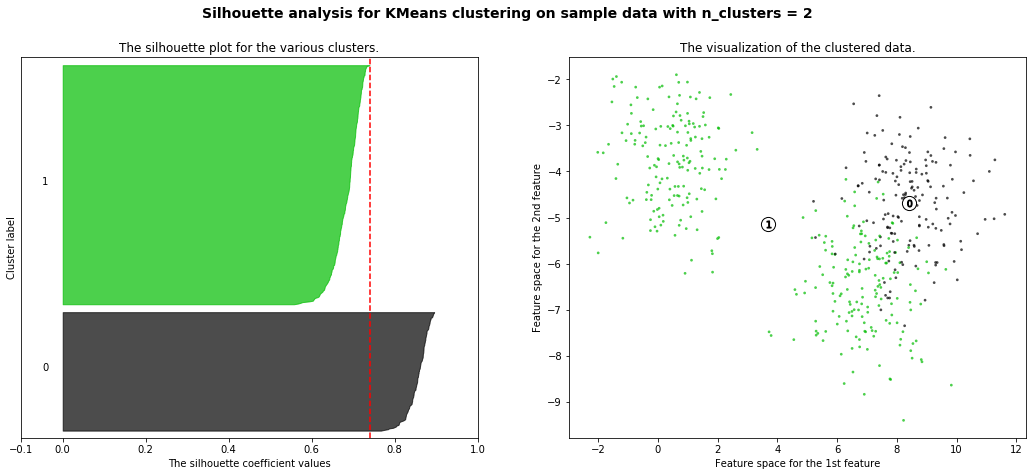

For n_clusters = 3 The average silhouette_score is : 0.7503123616753227


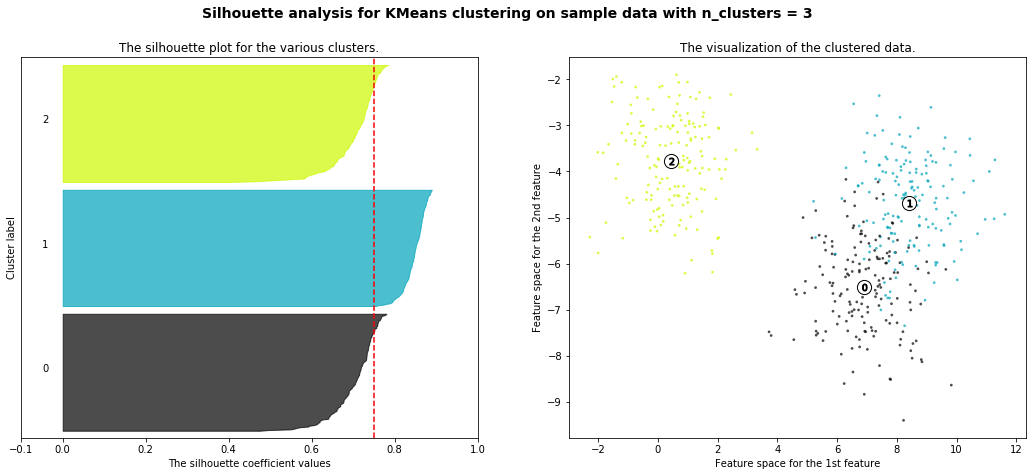

For n_clusters = 4 The average silhouette_score is : 0.5681636372918498


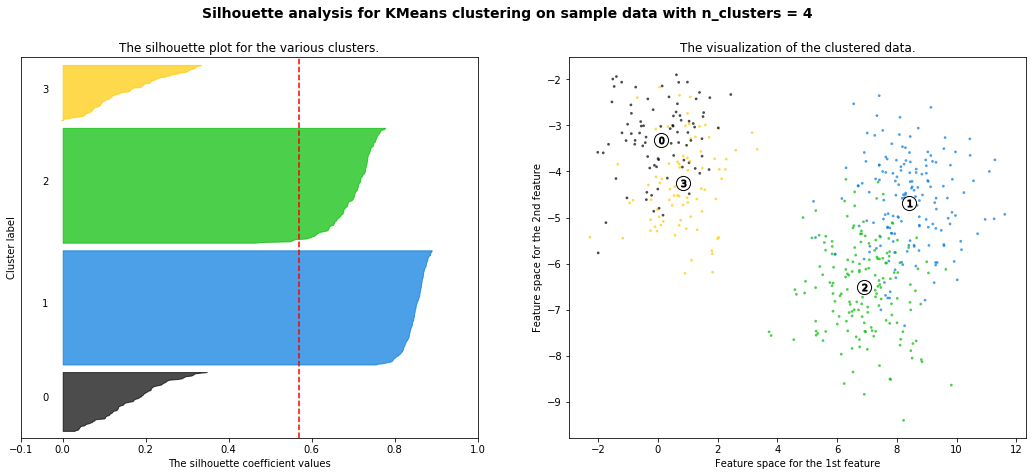

For n_clusters = 5 The average silhouette_score is : 0.3369005172146883


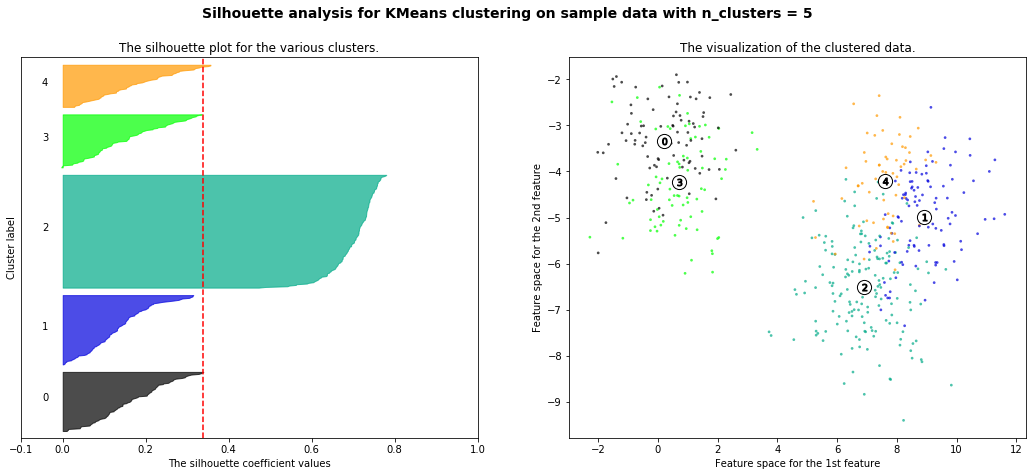

For n_clusters = 6 The average silhouette_score is : 0.14729131948546595


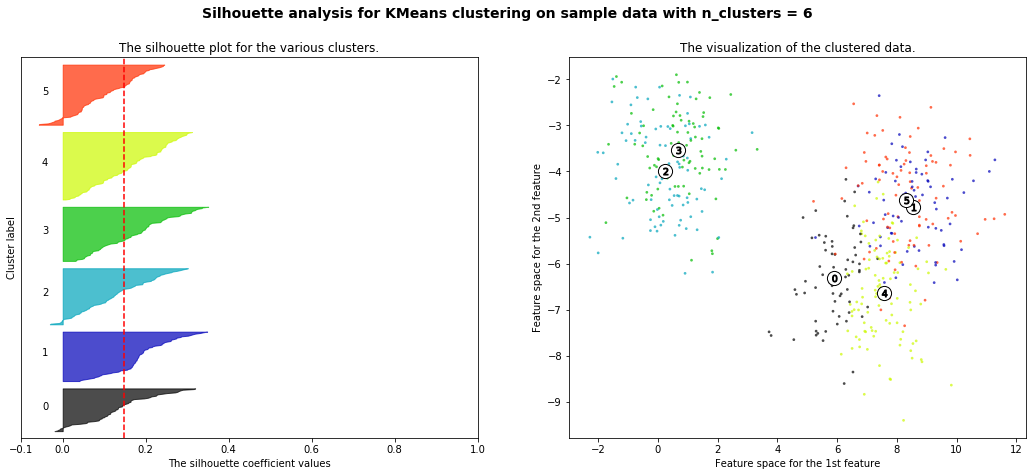

For n_clusters = 7 The average silhouette_score is : 0.15756191572765993


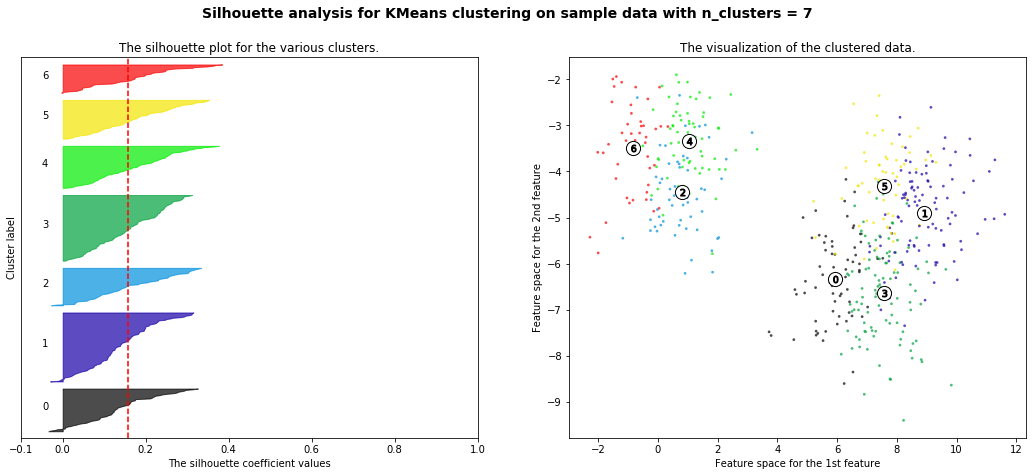

For n_clusters = 8 The average silhouette_score is : 0.15060493902766553


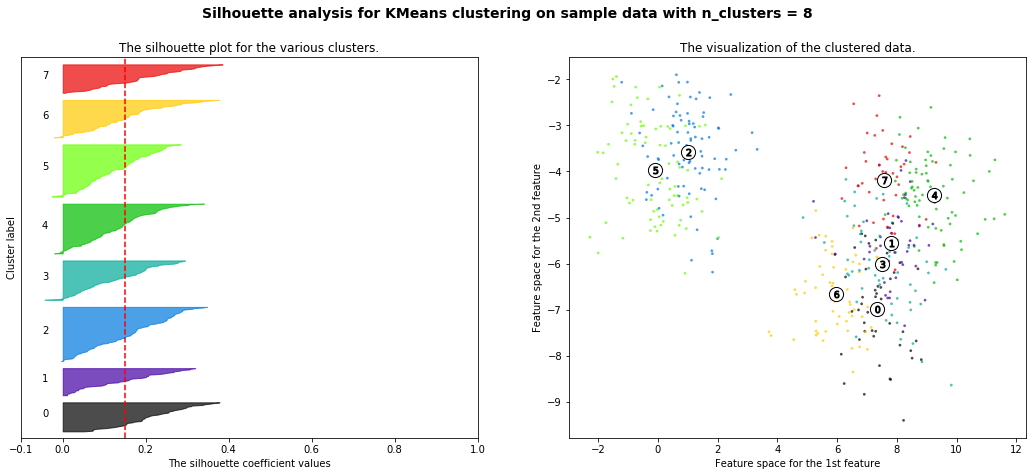

For n_clusters = 9 The average silhouette_score is : 0.16064770550771387


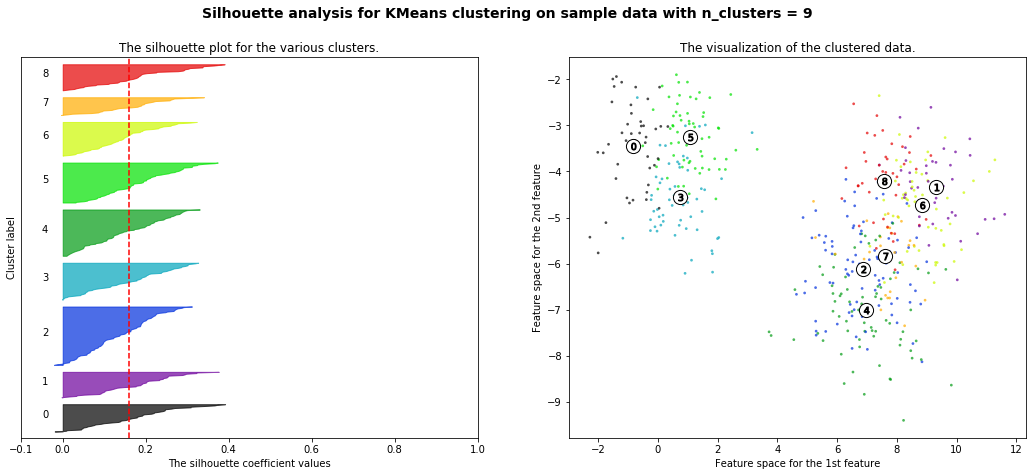

For n_clusters = 10 The average silhouette_score is : 0.15932356952535282


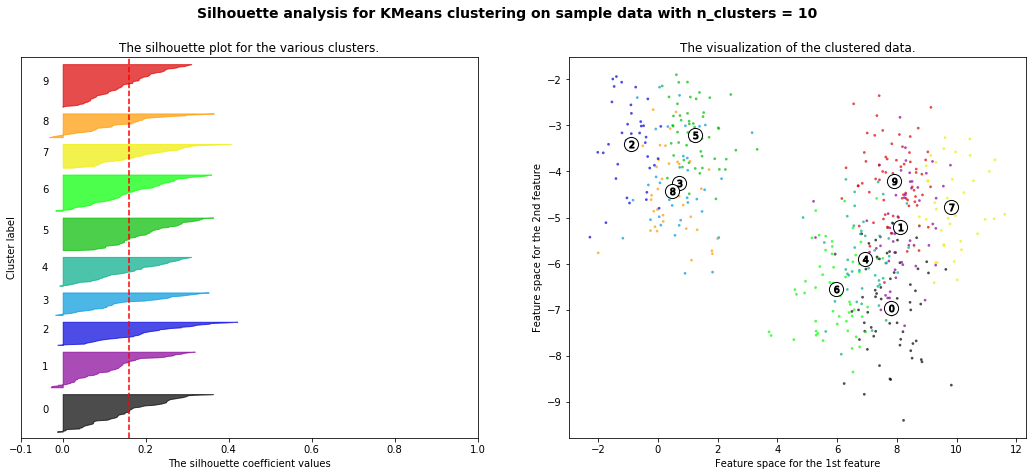

In [5]:
graph_analysis_best_number_cluster(X)

## _Inertia

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

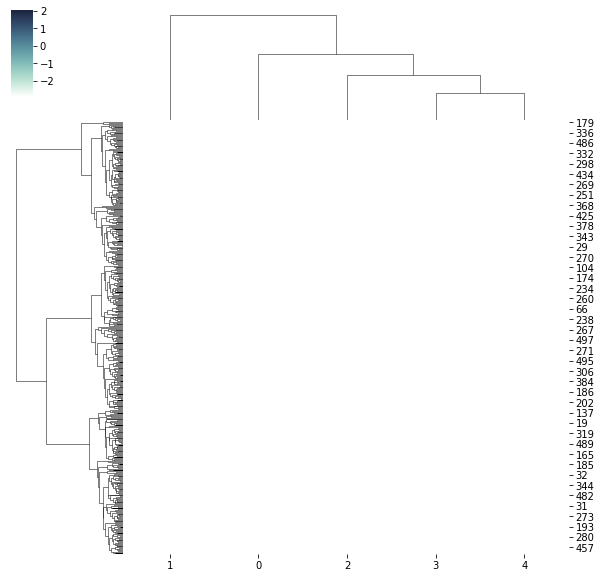

In [9]:
import seaborn as sn
%matplotlib inline
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(X_scaled, cmap=cmap, linewidths=.5)

In [10]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [11]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,cluster_errors,num_clusters
0,2500.000000,1
1,964.731322,2
2,307.025468,3
3,256.796436,4
4,207.941464,5
5,160.398485,6
6,148.647921,7
7,137.256968,8
8,126.895801,9
9,119.972671,10


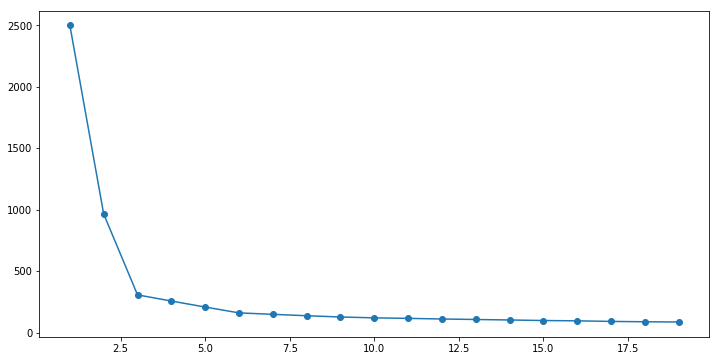

In [13]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )